In [1]:
import xbbg
from xbbg import blp

In [2]:
blp.bdp(['MSFT US Equity', 'AAPL US Equity', 'IBM US Equity'], 'last_price')


,last_price
AAPL US Equity,221.27
IBM US Equity,190.99
MSFT US Equity,414.01


In [5]:
data =BQL("MSFT US EQUITY,AAPL US EQUITY,IBM US EQUITY","PX_LAST(DATES=RANGE(2015-01-01,2024-07-19))")

NameError: name 'BQL' is not defined

In [6]:
blp.bdh(['MSFT US Equity', 'AAPL US Equity', 'IBM US Equity'], 'last_price')

,MSFT US Equity,AAPL US Equity,IBM US Equity
,last_price,last_price,last_price
2024-05-29,429.170,190.29,167.05
2024-05-30,414.670,191.29,165.63
2024-05-31,415.130,192.25,166.85
2024-06-03,413.520,194.03,165.28
2024-06-04,416.070,194.35,165.81
2024-06-05,424.010,195.87,167.38
2024-06-06,424.520,194.48,168.20
2024-06-07,423.850,196.89,170.01
2024-06-10,427.870,193.12,170.38


In [19]:
SPX_data = blp.bdh(tickers='SPX Index', flds=['High', 'Low', 'Last_Price'], start_date='2018-10-10', end_date='2024-7-18',)['SPX Index']
VIX_data = blp.bdh(tickers='VIX Index', flds=['Last_Price'], start_date='2018-10-10', end_date='2024-7-18',)['VIX Index']

In [8]:
SPX_data

,High,Low,Last_Price
2018-10-10,2874.02,2784.86,2785.68
2018-10-11,2795.14,2710.51,2728.37
2018-10-12,2775.77,2729.44,2767.13
2018-10-15,2775.99,2749.03,2750.79
2018-10-16,2813.46,2766.91,2809.92
...,...,...,...
2024-07-12,5655.56,5590.44,5615.35
2024-07-15,5666.94,5614.75,5631.22
2024-07-16,5669.67,5639.02,5667.20
2024-07-17,5622.49,5584.81,5588.27


<AxesSubplot:>

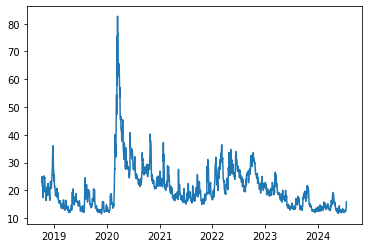

In [9]:
VIX_data['Last_Price'].plot()

<AxesSubplot:>

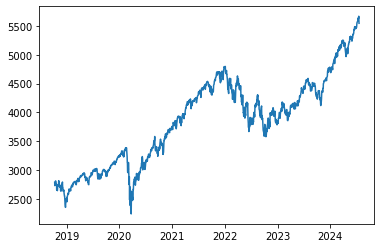

In [10]:
SPX_data['Last_Price'].plot()

In [11]:
beta = VIX_data.iloc[0,0]/SPX_data.iloc[0,0]
SPX_data = beta*SPX_data

In [19]:
portfolio = 0.1*VIX_data + 0.9*SPX_data

,High,Low,Last_Price
2018-10-10,22.960000,22.247718,22.254269
2018-10-11,22.329843,21.653750,21.796430
2018-10-12,22.175099,21.804978,22.106076
2018-10-15,22.176857,21.961479,21.975539
2018-10-16,22.476198,22.104319,22.447917
...,...,...,...
2024-07-12,45.181195,44.660964,44.859965
2024-07-15,45.272108,44.855172,44.986747
2024-07-16,45.293917,45.049060,45.274185
2024-07-17,44.917005,44.615987,44.643628


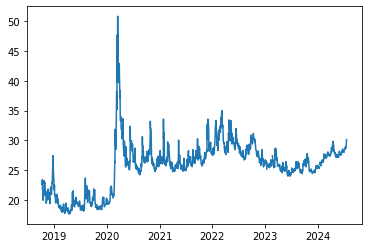

In [14]:
portfolio['Last_Price'].plot()
SPX_data

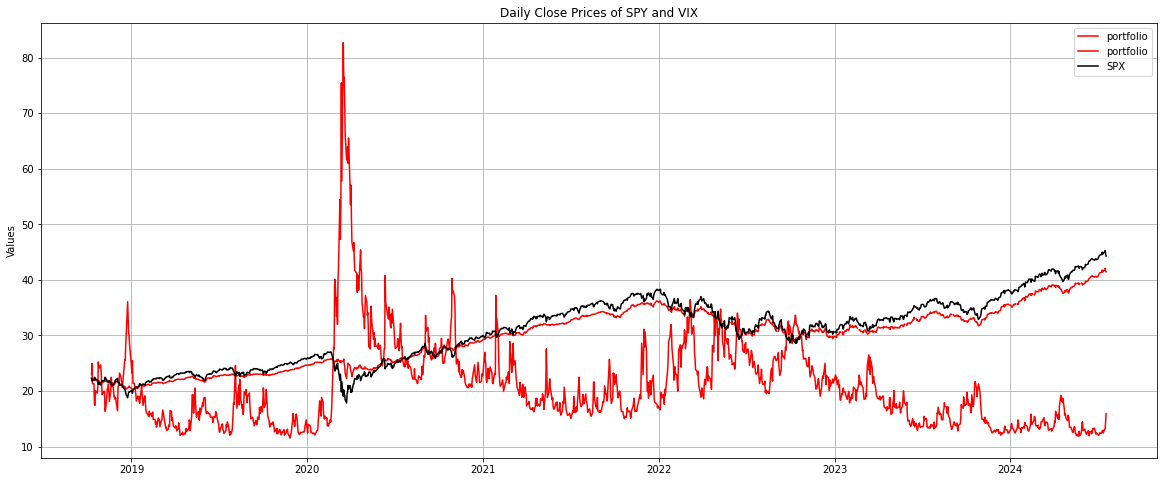

In [21]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8)) # Increases the Plot Size
plt.grid(True)
plt.title('Daily Close Prices of SPY and VIX')
plt.ylabel('Values')
plt.plot(portfolio['Last_Price'], 'red', label='portfolio')
plt.plot(VIX_data['Last_Price'], 'red', label='portfolio')

plt.plot(SPX_data['Last_Price'], 'black', label='SPX')

plt.legend()
plt.show()

VIX_data

In [47]:
VIX_data.values

array([[22.96],
       [24.98],
       [21.31],
       ...,
       [13.19],
       [14.48],
       [15.93]])

In [70]:
# importing libraries 
import matplotlib.pyplot as plt 
import numpy as np 
import math 


# daily rebalance low vol portfolio 
# daily rebalance trend following portfolio 
# static portfolio doesn t outperform but lower volatility than SPX 
VIX_return = VIX_data.pct_change()

def indicator_v1(t, window):
    if t <= window:
        return 0
    mean_vix = VIX_data.values[t-window: t+1, ].mean()
    VIX_return_t = VIX_return.values[t]
    VIX_std = VIX_return.rolling(window).std()
    VIX_std = VIX_std.values[t]
    #indicator1 =  VIX_return/VIX_std
    #indicator2 = (VIX_data.values[t,] - mean_vix)/vol 

    return VIX_return_t, VIX_std, mean_vix



    

In [71]:
indicator_v1(100, 80)

(array([0.05400254]), array([0.0774339]), 19.485308641975305)

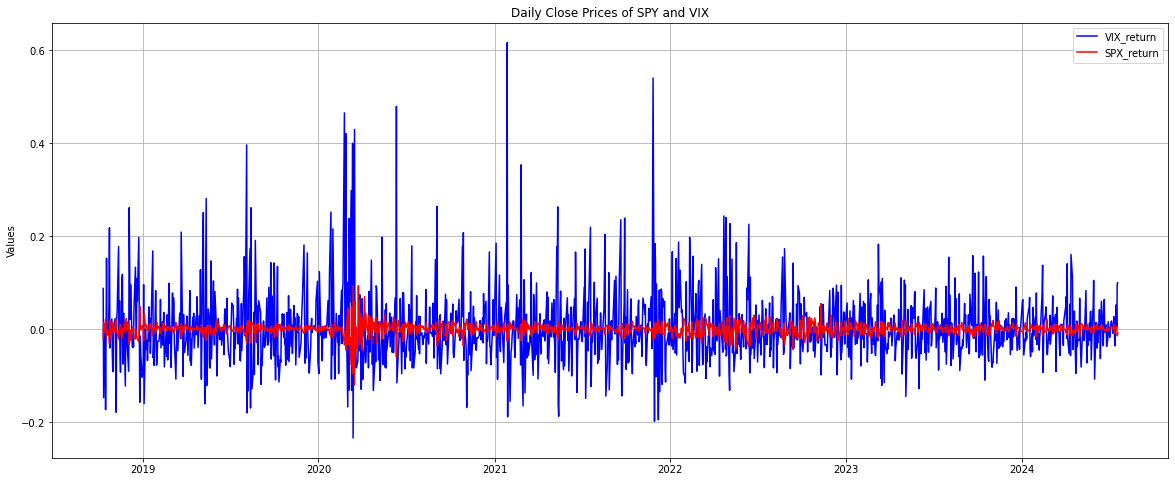

In [76]:
plt.figure(figsize=(20,8)) # Increases the Plot Size
plt.grid(True)
plt.title('Daily Close Prices of SPY and VIX')
plt.ylabel('Values')
plt.plot(VIX_return['Last_Price'], 'blue', label='VIX_return')
plt.plot(SPX_data.pct_change()['Last_Price'], 'red', label='SPX_return')


plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize

# Load your VIX and SPX data into a pandas DataFrame
# Assume columns are named 'VIX' and 'SPX' with a 'Date' index
data = pd.read_csv('your_data.csv', index_col='Date')

# Calculate daily returns
data['VIX_ret'] = data['VIX'].pct_change()
data['SPX_ret'] = data['SPX'].pct_change()
data.dropna(inplace=True)

def objective(weights, spx_ret, vix_ret):
  """Calculates the negative portfolio return (to minimize)."""
  portfolio_ret = weights[0] * spx_ret + weights[1] * vix_ret
  return -portfolio_ret

def optimize_portfolio(spx_ret, vix_ret):
  """Optimizes portfolio weights based on SPX return."""
  # Initial weights (50/50)
  initial_weights = [0.5, 0.5] 

  # Define bounds for weights (between 0 and 1)
  bounds = ((0, 1), (0, 1))

  # Constraint: sum of weights must equal 1
  constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

  # Adjust weights based on SPX return
  if spx_ret < -0.02:  # Example threshold: if SPX drops more than 2%
    initial_weights = [0.2, 0.8]  # Increase VIX weight

  # Optimization using SLSQP solver
  result = minimize(
      objective,
      initial_weights,
      args=(spx_ret, vix_ret),
      method='SLSQP',
      bounds=bounds,
      constraints=constraints
  )

  return result.x  # Optimal weights

# Initialize an empty list to store portfolio returns
portfolio_returns = []
# Initialize a list to store weights
weights_history = []

# Loop through each day to optimize and calculate portfolio return
for i in range(len(data)):
  spx_ret = data['SPX_ret'][i]
  vix_ret = data['VIX_ret'][i]
  
  # Optimize portfolio weights
  weights = optimize_portfolio(spx_ret, vix_ret)
  weights_history.append(weights)
  
  # Calculate portfolio return for that day
  portfolio_ret = weights[0] * spx_ret + weights[1] * vix_ret
  portfolio_returns.append(portfolio_ret)

# Add portfolio returns to the DataFrame
data['Portfolio_ret'] = portfolio_returns

# Calculate cumulative portfolio returns
data['Cumulative_ret'] = (1 + data['Portfolio_ret']).cumprod() - 1

# Analyze the results (e.g., plot cumulative returns, Sharpe Ratio)
print(data.head())
data['Cumulative_ret'].plot() 

# Access the weights history
print(weights_history[:5])  # Print the first 5 days' weights

In [35]:
# supposing there is an excel of openninsider data with api..
# also take btc/ ether as other assets 

#open_data

list_tickers = open_data["Ticker"].values.to_list()
# plot bloomberg data 
for ticker in list_tickers:
    



1008.15

In [23]:
# backtest strategy of opnnsdr
import pandas as pd
inside = pd.read_excel("C:/Users/UT3P5T/Documents/kaku/inside.xlsx")
alltick_norm =  pd.read_csv("C:/Users/UT3P5T/Documents/kaku/alltick_norm.csv")
print(inside.head())

     X         Filing Date Trade Date Ticker  \
0  NaN 2024-07-31 09:40:03 2024-07-29   BWFG   
1  NaN 2024-07-31 08:25:24 2024-07-30   BPRN   
2  NaN 2024-07-31 08:20:00 2024-07-30   PFBX   
3  NaN 2024-07-30 19:55:22 2024-07-30    MXL   
4    M 2024-07-30 19:11:19 2024-07-26    LGF   

                         Company Name             Insider Name  \
0      Bankwell Financial Group, Inc.           Leitao Kevin D   
1             Princeton Bancorp, Inc.           Tuchman Martin   
2         Peoples Financial Corp /ms/          Stilwell Joseph   
3                      Maxlinear, Inc        Seendripu Kishore   
4  Lions Gate Entertainment Corp /cn/  Liberty 77 Capital L.P.   

                 Title  Trade Type    Price     Qty     Owned  ΔOwn    Value  \
0                  Dir  P - Purchase  26.83    2500      2500   New    67075   
1             Dir, 10%  P - Purchase  37.46    7000    707000  0.01   262220   
2                  0.1  P - Purchase  16.85    2000    614794     0    337

In [3]:
ticklist = inside["Ticker"].values
alltick = blp.bdh(tickers=ticklist[0] +' US Equity', flds=['Last_Price'], start_date='2023-03-15', end_date='2024-7-18',)[ticklist[0] +' US Equity']
alltick = alltick.rename(columns ={"Last_Price":ticklist[0]})
print(alltick)

             BWFG
2023-03-15  25.74
2023-03-16  26.71
2023-03-17  25.97
2023-03-20  25.50
2023-03-21  26.52
...           ...
2024-07-12  24.45
2024-07-15  25.42
2024-07-16  26.42
2024-07-17  26.14
2024-07-18  25.47

[338 rows x 1 columns]


In [4]:
ticklist = inside["Ticker"].values
alltick = blp.bdh(tickers=ticklist[0] +' US Equity', flds=['Last_Price'], start_date='2023-03-15', end_date='2024-7-30',)[ticklist[0] +' US Equity']
alltick = alltick.rename(columns ={"Last_Price":ticklist[0]})
print(alltick)
for tick in ticklist:
    try:

        df = blp.bdh(tick +' US Equity', flds=['Last_Price'], start_date='2023-03-15', end_date='2024-7-30',)[tick +' US Equity']
        df = df.rename(columns ={"Last_Price":tick})
        alltick = pd.concat([alltick, df], axis=1)
    except:
        pass
#alltick 

             BWFG
2023-03-15  25.74
2023-03-16  26.71
2023-03-17  25.97
2023-03-20  25.50
2023-03-21  26.52
...           ...
2024-07-24  26.46
2024-07-25  26.37
2024-07-26  27.16
2024-07-29  26.67
2024-07-30  28.19

[346 rows x 1 columns]


#  data set of all tickers 

In [5]:
alltick.shape
# let s clean alltick 

(346, 8697)

In [69]:
alltick

,BWFG,BWFG,BPRN,PFBX,MXL,ZYXI,PMT,TTSH,ALLE,ALLE,...,TRST,CMAX,ORMP,AMPY,VLY,DX,PRTS,HHC,ATEC,PDM
2023-03-15,25.74,25.74,31.40,NaN,32.870,11.000,11.95,4.63,103.84,103.84,...,34.05,106.8011,2.02,6.76,9.74,11.73,5.300,75.59,15.10,7.75
2023-03-16,26.71,26.71,32.66,15.0500,34.220,10.755,11.99,4.77,106.18,106.18,...,35.23,109.2011,2.21,6.96,9.93,12.03,5.530,78.63,15.46,7.46
2023-03-17,25.97,25.97,31.63,13.5101,34.050,10.500,11.36,4.71,103.32,103.32,...,33.97,91.9509,2.23,6.58,9.52,11.68,5.420,74.68,15.30,7.01
2023-03-20,25.50,25.50,31.41,NaN,35.040,10.480,11.54,4.63,105.81,105.81,...,33.61,83.7008,2.19,6.40,9.59,11.57,5.280,75.59,15.31,7.07
2023-03-21,26.52,26.52,31.90,13.5000,35.560,11.110,11.67,4.73,106.92,106.92,...,34.38,100.8010,2.22,6.86,9.97,11.75,5.510,78.20,16.00,7.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-24,26.46,26.46,36.66,NaN,22.290,10.080,13.32,6.95,127.86,127.86,...,33.92,3.8800,2.58,7.72,7.83,12.28,1.100,NaN,10.91,8.38
2024-07-25,26.37,26.37,37.66,16.5000,14.020,10.190,13.55,7.00,132.88,132.88,...,35.02,5.6400,2.54,7.79,8.07,12.08,1.200,NaN,10.87,8.37
2024-07-26,27.16,27.16,37.71,NaN,12.775,8.930,13.76,7.01,136.77,136.77,...,35.40,6.3900,2.60,7.79,8.23,12.21,1.250,NaN,10.91,8.74
2024-07-29,26.67,26.67,37.46,16.2500,13.770,8.340,13.64,7.23,137.66,137.66,...,34.28,6.2900,2.52,7.20,8.03,12.13,1.235,NaN,10.00,8.58


In [13]:
alltick.values[0,:]

array([2.4760000e+01, 2.4760000e+01, 2.9800000e+01, 1.2745000e+01,
       2.2260000e+01, 8.3300000e+00, 1.2180000e+01, 5.2500000e+00,
       1.0547000e+02, 1.0547000e+02, 1.2745000e+01, 4.0190000e+01,
       7.0000000e+01,           nan,           nan,           nan,
                 nan,           nan, 9.6370000e+01, 9.6370000e+01,
       5.8210000e+01, 1.0610000e+01, 5.1200000e+01, 5.1200000e+01,
       5.1200000e+01, 5.1200000e+01, 4.0000000e-04, 4.0000000e-04,
       1.8310000e+01, 1.8310000e+01, 1.8310000e+01, 1.8310000e+01,
       1.8310000e+01, 1.8310000e+01, 1.8310000e+01, 1.8310000e+01,
       1.8310000e+01, 3.1480000e+01, 3.3000000e+00, 1.0650000e+01,
       4.3110000e+01, 1.1288000e+02,           nan, 2.0500000e+00,
       1.0460000e+01,           nan,           nan, 3.6550000e+01,
       3.6550000e+01, 1.5555000e+02, 1.0610000e+01, 5.8210000e+01,
       6.0600000e+00, 2.9250000e+01, 1.6100000e+00, 1.4150000e+00,
       7.2000000e+00,           nan, 2.7900000e+01,           

In [70]:
numpy.isnan(alltick.values[201,]).any()

True

In [6]:
alltick.isnull().sum(axis =0)


BWFG      0
BWFG      0
BPRN      0
PFBX    169
MXL       0
       ... 
DX        0
PRTS      0
HHC     242
ATEC      0
PDM       0
Length: 8697, dtype: int64

In [7]:
alltick_clean = alltick.dropna(axis=1) # 800 columns that don t contain Nan, extremely sufficient 


In [8]:
# la strategie 
# entrer dans la position quand y a un insider 
# condition: Value>200k, title diff than 10%, current price and traded price close 
# normalization of prices ? yes bc of fractional shares ? 
# 
#  
def normalize(data):
    vect_first_prices = data.values[0,:] # take array of first date s prices. We normalize by this vector 
    data = data/vect_first_prices
    return data 


#

In [9]:
alltick_norm = normalize(alltick_clean)

In [20]:
# define strategy 
# the important excel remains inside 

insider_list = ['Dir', 'CEO', 'Pres', 'VP', 'CFO', 'Chief Exec. Off']
thres_delta = 0.06
thres_value = 400000
thres_price = 0.02 # relative value of traded price and current price of the stock 

inside["ΔOwn"].values[0:10]

array(['New', 0.01, 0, 0.02, 0.04, 0.11, 0.06, 0, 0.04, 0.22],
      dtype=object)

In [22]:
inside

,X,Filing Date,Trade Date,Ticker,Company Name,Insider Name,Title,Trade Type,Price,Qty,Owned,ΔOwn,Value,1d,1w,1m,6m
0,NaN,2024-07-31 09:40:03,2024-07-29,BWFG,"Bankwell Financial Group, Inc.",Leitao Kevin D,Dir,P - Purchase,26.83,2500,2500,New,67075,NaN,NaN,NaN,NaN
1,NaN,2024-07-31 08:25:24,2024-07-30,BPRN,"Princeton Bancorp, Inc.",Tuchman Martin,"Dir, 10%",P - Purchase,37.46,7000,707000,0.01,262220,NaN,NaN,NaN,NaN
2,NaN,2024-07-31 08:20:00,2024-07-30,PFBX,Peoples Financial Corp /ms/,Stilwell Joseph,0.1,P - Purchase,16.85,2000,614794,0,33700,NaN,NaN,NaN,NaN
3,NaN,2024-07-30 19:55:22,2024-07-30,MXL,"Maxlinear, Inc",Seendripu Kishore,"COB, Pres, CEO, 10%",P - Purchase,12.94,108303,4954999,0.02,1401592,NaN,NaN,NaN,NaN
4,M,2024-07-30 19:11:19,2024-07-26,LGF,Lions Gate Entertainment Corp /cn/,Liberty 77 Capital L.P.,0.1,P - Purchase,8.50,385831,11055980,0.04,3278206,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8993,NaN,2023-03-15 17:03:40,2023-03-15,PRTS,"Carparts.Com, Inc.",Barnes Jim,Dir,P - Purchase,5.34,18700,85297,0.28,99858,NaN,NaN,NaN,NaN
8994,M,2023-03-15 16:46:23,2023-03-13,HHC,Howard Hughes Corp,"Pershing Square Capital Management, L.P.","Dir, 10%",P - Purchase,74.68,62474,15957609,0,4665377,NaN,NaN,NaN,NaN
8995,NaN,2023-03-15 16:45:42,2023-03-13,ATEC,"Alphatec Holdings, Inc.",Pelizzon David R,"Dir, 10%",P - Purchase,15.24,3100,11674290,0,47244,NaN,NaN,NaN,NaN
8996,NaN,2023-03-15 16:44:35,2023-03-15,PDM,"Piedmont Office Realty Trust, Inc.",Smith Christopher Brent,"Pres, Chief Exec. Off",P - Purchase,7.67,7000,276814,0.03,53690,NaN,NaN,NaN,NaN


In [18]:
'Dir' in 'Dir, CEO'

True

In [10]:
alltick_norm

,BWFG,BWFG,BPRN,MXL,ZYXI,PMT,TTSH,ALLE,ALLE,AEHR,...,NRGV,TRST,CMAX,ORMP,AMPY,VLY,DX,PRTS,ATEC,PDM
2023-03-15,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2023-03-16,1.037685,1.037685,1.040127,1.041071,0.977727,1.003347,1.030238,1.022535,1.022535,1.094270,...,1.059091,1.034655,1.022472,1.094059,1.029586,1.019507,1.025575,1.043396,1.023841,0.962581
2023-03-17,1.008936,1.008936,1.007325,1.035899,0.954545,0.950628,1.017279,0.994992,0.994992,1.074284,...,1.004545,0.997651,0.860955,1.103960,0.973373,0.977413,0.995737,1.022642,1.013245,0.904516
2023-03-20,0.990676,0.990676,1.000318,1.066018,0.952727,0.965690,1.000000,1.018971,1.018971,1.066289,...,0.954545,0.987078,0.783707,1.084158,0.946746,0.984600,0.986360,0.996226,1.013907,0.912258
2023-03-21,1.030303,1.030303,1.015924,1.081838,1.010000,0.976569,1.021598,1.029661,1.029661,1.230180,...,1.031818,1.009692,0.943820,1.099010,1.014793,1.023614,1.001705,1.039623,1.059603,0.947097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-24,1.027972,1.027972,1.167516,0.678126,0.916364,1.114644,1.501080,1.231317,1.231317,0.567622,...,0.490909,0.996182,0.036329,1.277228,1.142012,0.803901,1.046888,0.207547,0.722517,1.081290
2024-07-25,1.024476,1.024476,1.199363,0.426529,0.926364,1.133891,1.511879,1.279661,1.279661,0.588274,...,0.522727,1.028488,0.052808,1.257426,1.152367,0.828542,1.029838,0.226415,0.719868,1.080000
2024-07-26,1.055167,1.055167,1.200955,0.388652,0.811818,1.151464,1.514039,1.317122,1.317122,0.595603,...,0.545455,1.039648,0.059831,1.287129,1.152367,0.844969,1.040921,0.235849,0.722517,1.127742
2024-07-29,1.036131,1.036131,1.192994,0.418923,0.758182,1.141423,1.561555,1.325693,1.325693,0.617588,...,0.509091,1.006755,0.058895,1.247525,1.065089,0.824435,1.034101,0.233019,0.662252,1.107097


In [11]:
from pathlib import Path  
filepath = Path('C:/Users/UT3P5T/Documents/kaku/alltick_norm.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
alltick_norm.to_csv(filepath) 

<AxesSubplot:>

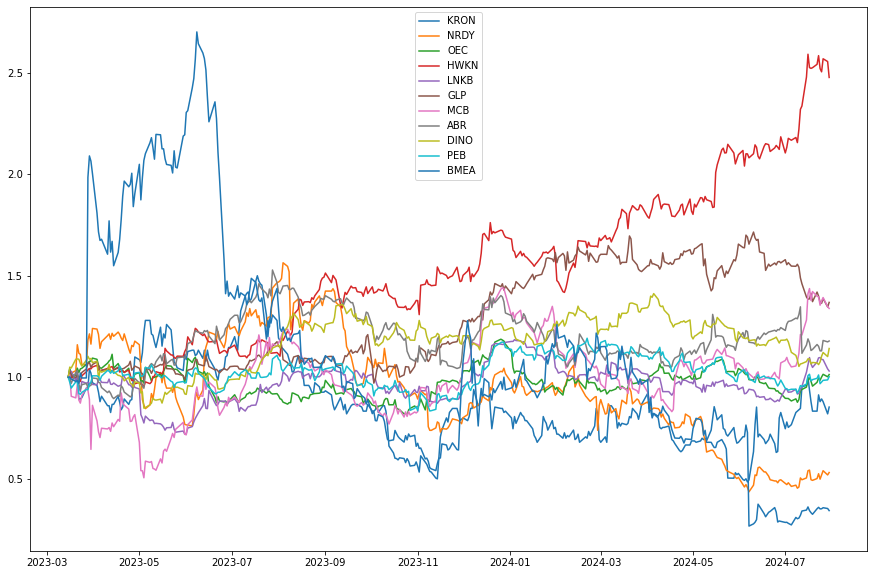

In [12]:
alltick_norm.iloc[:,400:411].plot(figsize = (15,10))